<a href="https://www.kaggle.com/code/soumyadipbhat/data-analysis-with-hotel-price-data?scriptVersionId=140611873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <span style='background-color:orange; padding: 20px'>Hotel Price in India Analysis</span> 
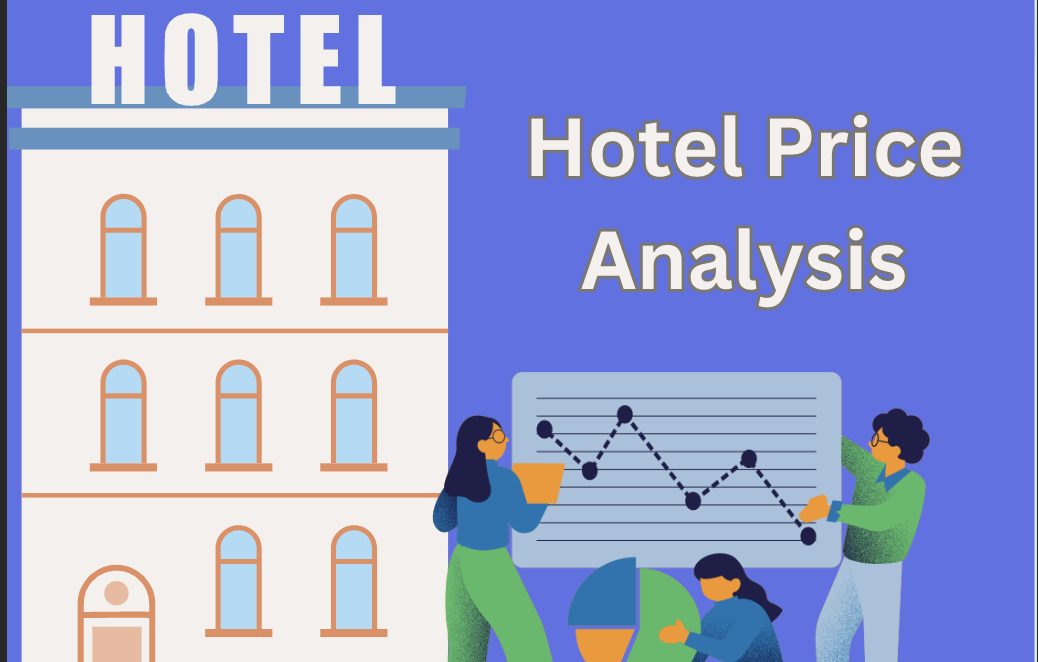\
**<span style='background-color:orange'>Dataset obtained from kaggle:</span>** [Show Dataset](https://www.kaggle.com/datasets/andrewgeorgeissac/hotel-price-data-of-cities-in-india-makemytrip)\
**<span style='background-color:orange'>Data Description:</span>** This data is from [MakeMyTrip website](https://www.makemytrip.com/) by web scrapping.

> Columns in the dataset:
> * Hotel Name
> * Rating
> * Rating Description
> * Reviews
> * Star rating
> * Location
> * Nearest Landmark
> * Distance to the Landmark
> * Price
> * Tax

**NOTE:** Total Price = Price + Tax



In [1]:
# Import the modules needed:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <span style='background-color:orange; padding:10px'>Data Insight</span>
Although the data is available for Bangalore, Chennai, Hyderabad, Delhi, Kolkata in this notebook I'll only work with the Bangalore data

In [2]:
# Loading the data:
file_path = '/kaggle/input/hotel-price-data-of-cities-in-india-makemytrip/bangalore.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,NaN,NaN,"7,567","2,254"
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,NaN,NaN,"1,509",531
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.4 km,"9,900",NaN
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,770 m,"2,347",918
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,NaN,NaN,"2,522","1,014"


I don't like spaces between the columns, because when using dot notation for accessing a column(`df.Rating Description`) it doesn't work.
Here I am renaming the columns, just putting a "_" in the spaces.

In [4]:
# Renaming the Columns
df.rename(columns ={'Rating Description':'Rating_Description',
                    'Star Rating':'Star_Rating',
                    'Nearest Landmark':'Nearest_Landmark',
                    'Distance to Landmark': 'Distance_to_Landmark'}, inplace = True)
df.head()

,Hotel Name,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,NaN,NaN,"7,567","2,254"
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,NaN,NaN,"1,509",531
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.4 km,"9,900",NaN
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,770 m,"2,347",918
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,NaN,NaN,"2,522","1,014"


## <span style='background-color:orange; padding:10px'>Exploratory Data Analysis</span>
Steps:
* Drop unnecessary/unimportant data

In [5]:
# drop the Hotel as it won't contribute to the training:
df.drop('Hotel Name', axis = 1, inplace = True)

## <span style='background-color:orange; padding:10px'>Visualize Missing values</span>
To visualize missing values here I've shown so many plotting styles:
* Seaborn Heatmap
* Seaborn Barplot
* Missingno Heatmap [Later in this notebook]
* Missingno Heatmap [Later in this notebook]

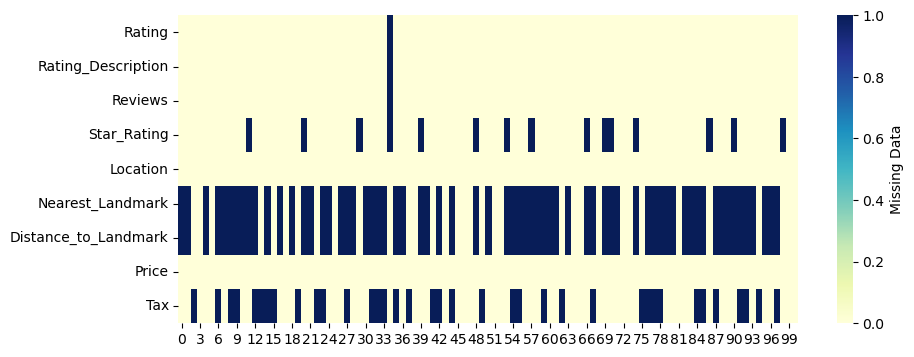

In [6]:
# heatmap
plt.figure(figsize = (10,4))
sns.heatmap(df.isna().transpose(),
            cmap = "YlGnBu",
            cbar_kws = {'label': 'Missing Data'})
plt.show()

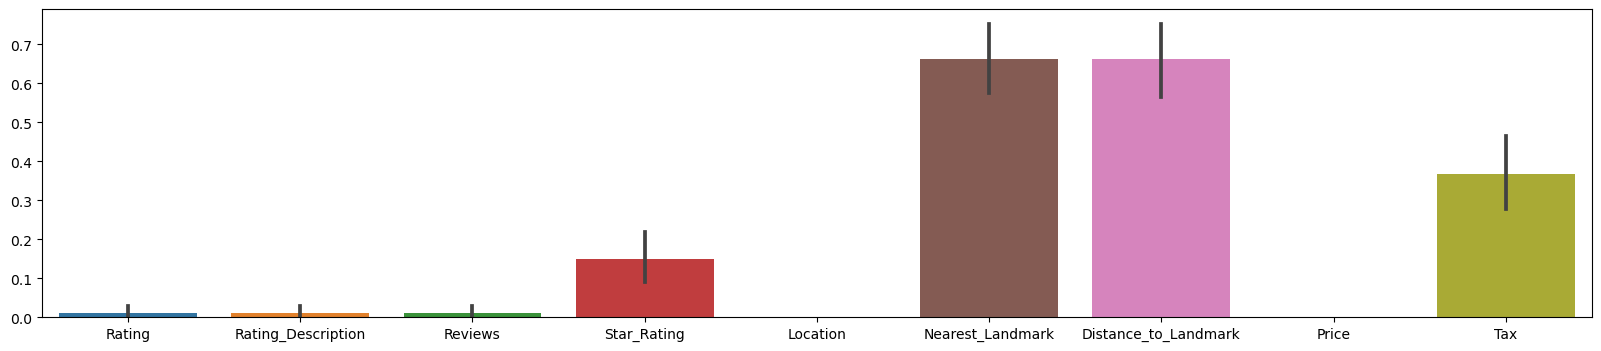

In [7]:
# Bar plot:
plt.figure(figsize=(20,4))
sns.barplot(df.isna())
plt.show()

Another great package for visualising missing values is **<span style='color:blue; padding:5px'>missingno</span>**
* `missingno.bar()` plots count of the variables ignoring missing value
* `missingno.heatmap()` plots correlation between the columns (if the column A and B has correlation of 1.0 then we can conclude that if A column is missing then column B will be surely missing, and the opposite if the correlation is -1

<Axes: >

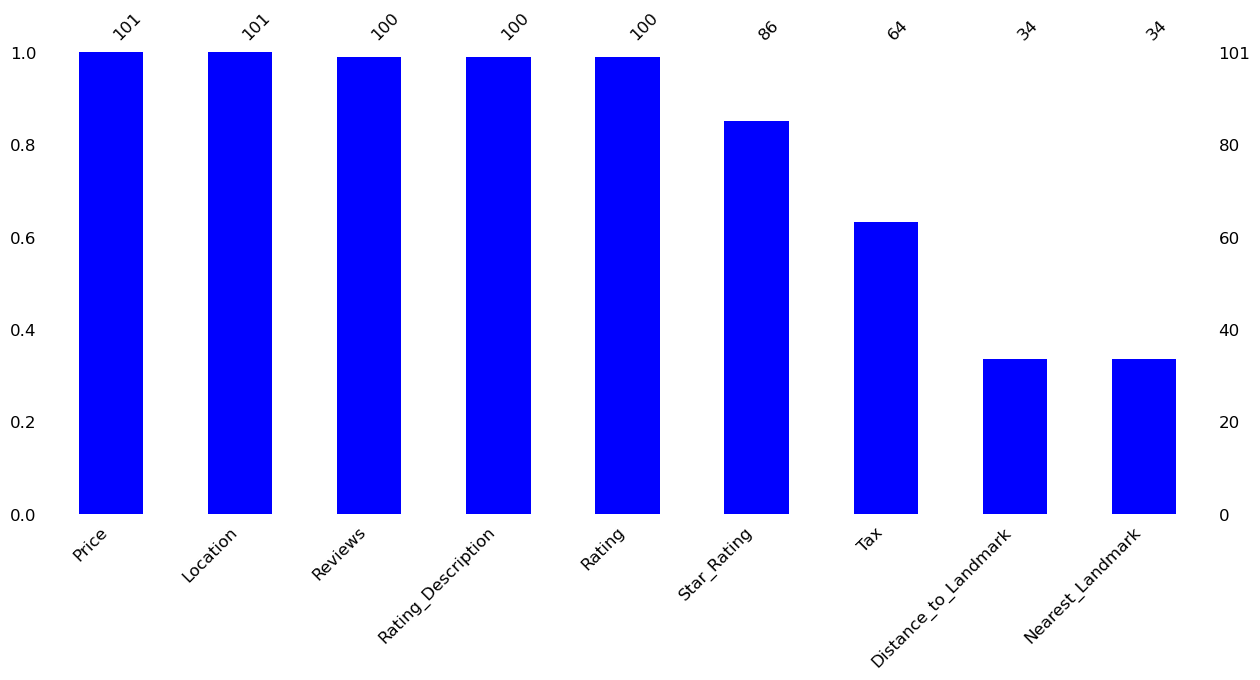

In [8]:
# barplot with missingno
msno.bar(df, color = "blue", sort='descending', figsize=(15, 6), fontsize = 12)

<Axes: >

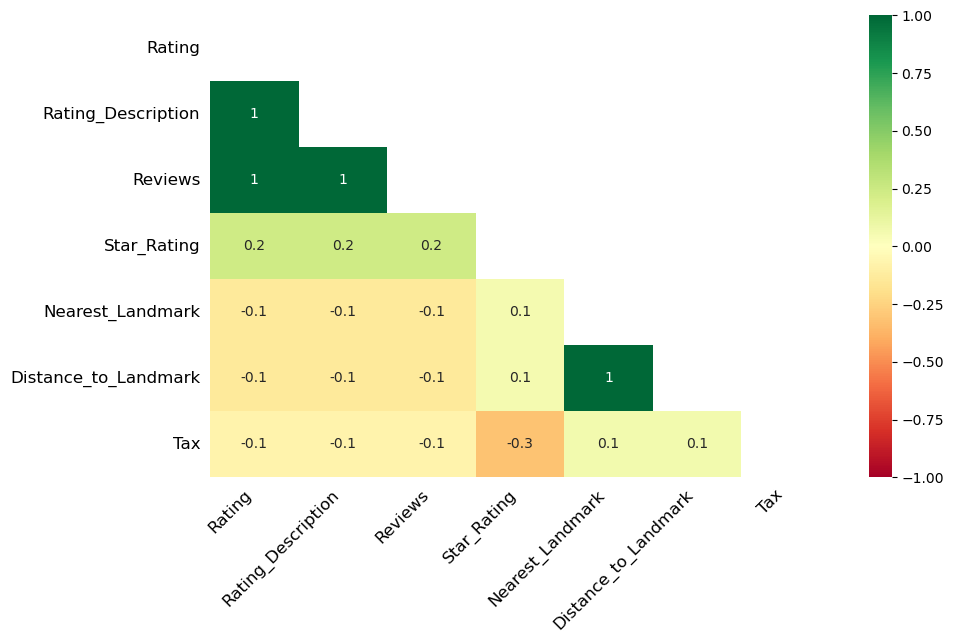

In [9]:
# Heatmap using missingno
msno.heatmap(df, cmap="RdYlGn", figsize=(10, 6), fontsize=12)

## <span style='background-color:orange; padding:10px'>Comment about missing value</span>
We can see a correlation = 1 between `Rating_Description` & `Reviews` and `Nearest_Landmark` & `Distance_to_Landmark`

## <span style='background-color:orange; padding:10px'>Correlation</span>
**NOTE:** `Price` and `Tax` is a string type, we have to omit the comma and make it float type. Otherwise, correlation can not be visualized

In [10]:
df.Price = df.Price.str.replace(",","")
df.Price = df.Price.astype(float)

df.Tax = df.Tax.str.replace(",", "").astype(float)

<Axes: >

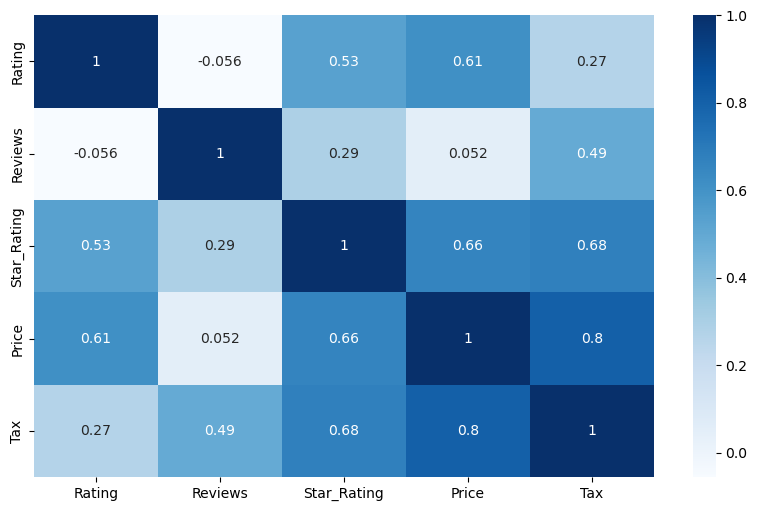

In [11]:
# Correlation:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(['Rating_Description','Location', 'Distance_to_Landmark','Nearest_Landmark'], axis = 1).corr(), cmap="Blues", annot = True)

In [12]:
df.head()

,Rating,Rating_Description,Reviews,Star_Rating,Location,Nearest_Landmark,Distance_to_Landmark,Price,Tax
0,3.9,Very Good,4187.0,5.0,Ulsoor,NaN,NaN,7567.0,2254.0
1,4.0,Very Good,2201.0,4.0,Brookefield,NaN,NaN,1509.0,531.0
2,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.4 km,9900.0,NaN
3,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,770 m,2347.0,918.0
4,4.0,Very Good,3290.0,4.0,Hosur road,NaN,NaN,2522.0,1014.0


The correlation between `Rating` and `Price` is nearly equal to the correlation between `Star_Rating` and `Price`.\
And `Tax` has a strong correlation with `Price` also.


<Figure size 1000x600 with 0 Axes>

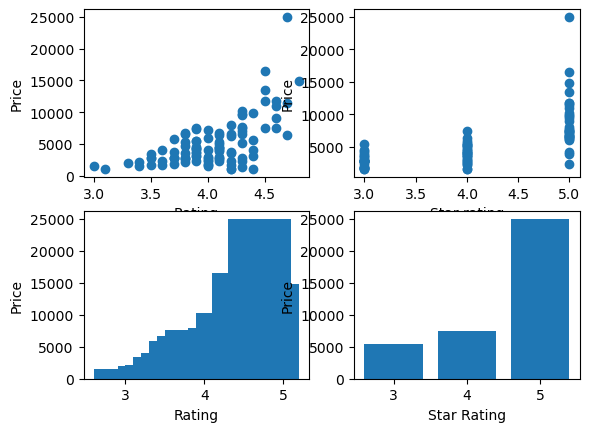

In [13]:
# Rating vs Price and Star_Rating vs Price plot
plt.figure(figsize=(10, 6))
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

ax1.scatter(df.Rating, df.Price)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Price')

ax2.scatter(df.Star_Rating, df.Price)
ax2.set_xlabel('Star rating')
ax2.set_ylabel('Price')

ax3.bar(df.Rating, df.Price)
ax3.set_xlabel('Rating')
ax3.set_ylabel('Price')

ax4.bar(df.Star_Rating, df.Price)
ax4.set_xlabel('Star Rating')
ax4.set_ylabel('Price')
plt.show()

Looks like values between < 3.9 are equal to 3, same for 4 and 5 also

In [14]:
len(df[df.Rating < 3.9]), len(df[df.Star_Rating == 3])

(27, 25)

This may not be true. maybe there is another categorisation threshold chosen.
However, we'll drop this column as it is a categorisation of the Rating column and it is just increasing dimension of the data.

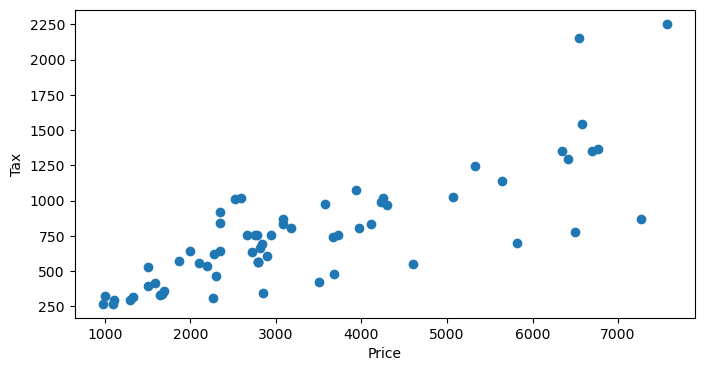

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(df.Price, df.Tax)
plt.xlabel('Price')
plt.ylabel('Tax');
plt.show()

we can see there is a linear relation between `Tax` and `Price`.

## <span style='background-color:orange; padding:10px'>Pairplot</span>

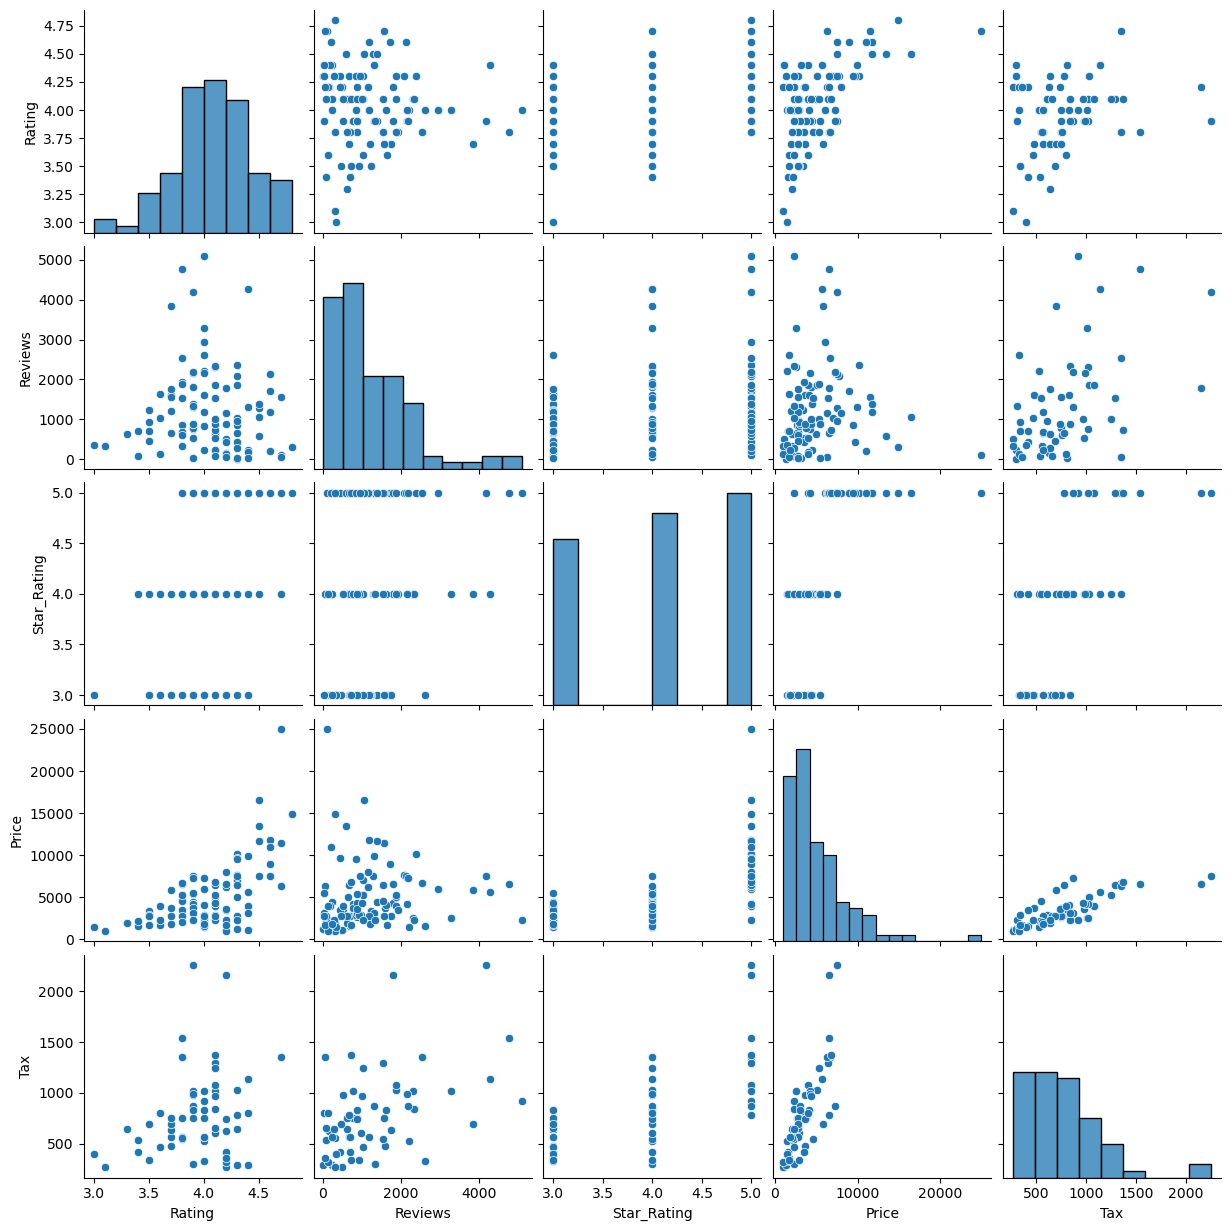

In [16]:
sns.pairplot(df)

## <span style='background-color:orange; padding:10px'>Places vs Price Plot</span>

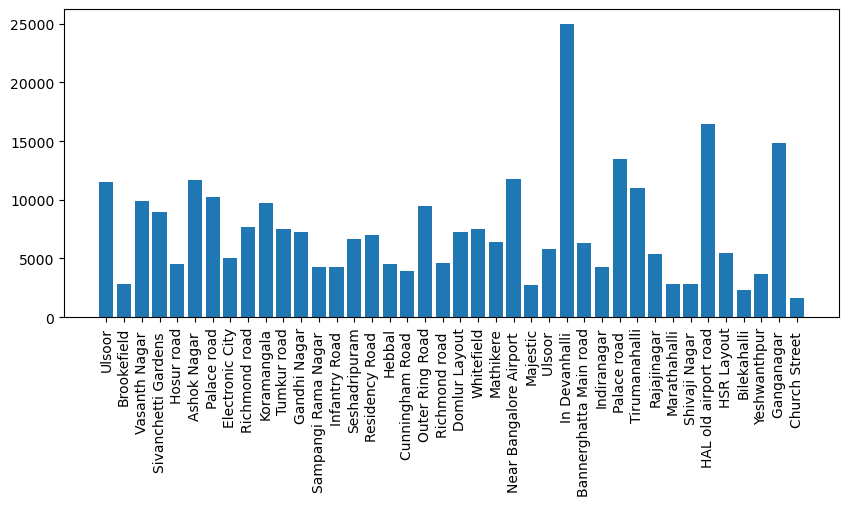

In [17]:
plt.figure(figsize=(10, 4))
plt.bar(df.Location, df.Price)
plt.xticks(rotation=90)
plt.show()

## <span style='background-color:orange; padding:10px'>Average Hotel price</span>

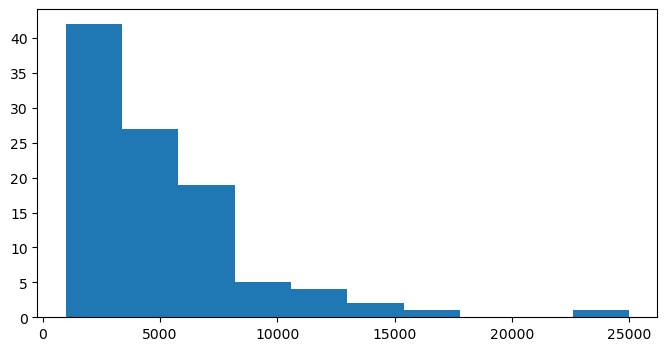

In [18]:
plt.figure(figsize=(8, 4))
plt.hist(df.Price)
plt.show()

Most of the Hotels charges below 5000.

## <span style='background-color:orange; padding:10px'>Average Quality of hotels</span>

<Axes: xlabel='Rating', ylabel='Count'>

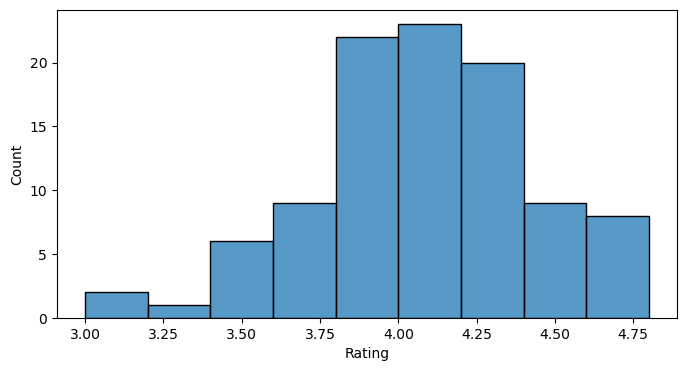

In [19]:
plt.figure(figsize = (8, 4))
sns.histplot(df.Rating)

Most of the hotels has 4+ rating, good quality.

## <span style='background-color:orange; padding:10px'>Quality Hotels vs Number of Customers[Reviews]</span>

<BarContainer object of 101 artists>

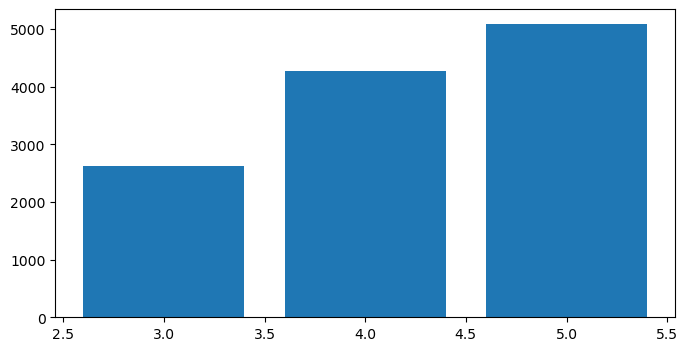

In [20]:
plt.figure(figsize = (8, 4))
plt.bar(df.Star_Rating, df.Reviews)

Looks Like most of the people goes to good quality hotels, Or we can say good rating attracts customers more

## <span style='background-color:orange; padding:10px'>Price vs Number of Customers</span>

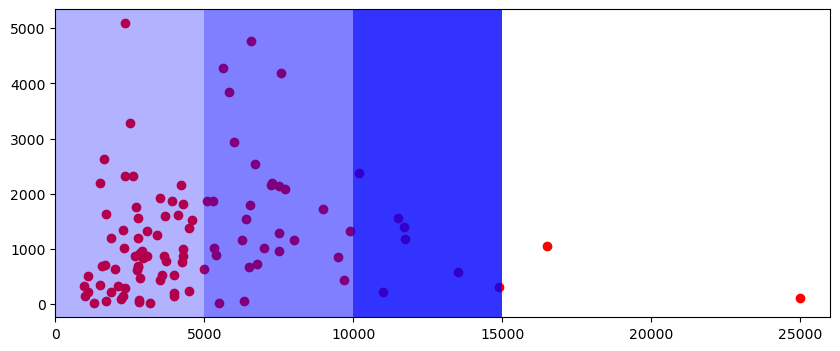

In [21]:
plt.figure(figsize = (10, 4))
plt.scatter(df.Price, df.Reviews, c='red')
plt.axvspan(0,5000, facecolor='b', alpha = 0.3)
plt.axvspan(5000, 10000, facecolor='b', alpha=0.5)
plt.axvspan(10000, 15000, facecolor = 'b', alpha = 0.8)
plt.xlim(0,26000)
plt.show()

Majority of the people takes hotels in 0 to 5000 range, That's why most of the hotel price is about ~5000

## <span style='background-color:orange; padding:10px'>Location vs No of Customers [Reviews]</span>

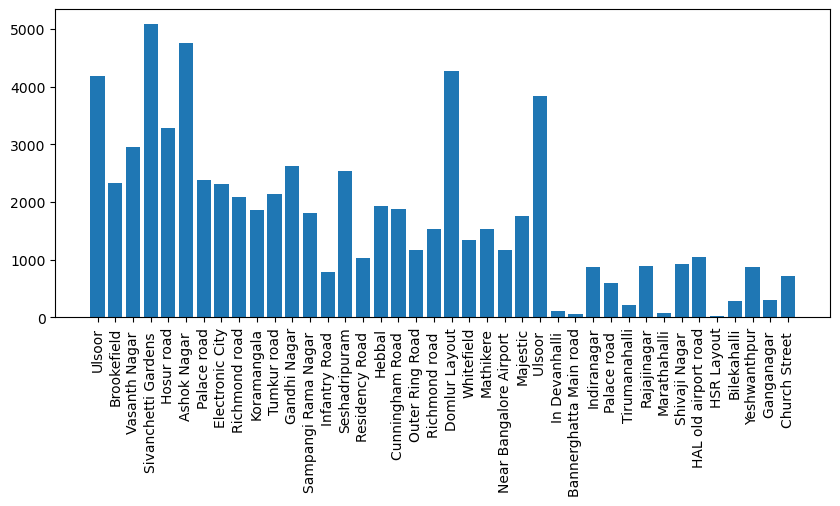

In [22]:
plt.figure(figsize=(10, 4))
plt.bar(df.Location, df.Reviews)
plt.xticks(rotation=90)
plt.show()

In [23]:
df.Location[df.Reviews > 3000].unique

<bound method Series.unique of 0                   Ulsoor
3     Sivanchetti Gardens 
4               Hosur road
5             Ashok Nagar 
30           Domlur Layout
46                 Ulsoor 
Name: Location, dtype: object>

The upper mentioned Places must be so popular or, they are near some popular landmark.